# 🧪 Статистическая проверка гипотез: факторы риска ССЗ  
*(Формулировка гипотез, проверка допущений, выбор критериев, интерпретация p-value и clinical significance)*

> **Цель блока**: Проверить три клинически значимые гипотезы о связи образа жизни и метаболических показателей с риском сердечно-сосудистых заболеваний (ССЗ), используя строгий статистический подход: от диагностики распределений до пост-хок-анализа.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm #загружаем график нормального распределения
import scipy.stats as scs
import statsmodels.stats.diagnostic as sm
import statsmodels.api as sml # для Q-Q plot
from statsmodels import stats as sms
from scipy.stats import shapiro
from scipy.stats import bartlett
from scipy.stats import ttest_1samp
from scipy.stats import ttest_rel

In [ ]:
heart1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Итоговый_проект/heart1.csv')
heart1.head().T


,0,1,2,3,4
Возраст алког,18.0,90.0,17.0,13.0,16.0
Работа,1,0,0,1,0
Статус Курения,Курит,Никогда не курил(а),Никогда не курил(а),Бросил(а),Никогда не курил(а)
Переломы,0,1,0,0,1
Время пробуждения,6,4,7,7,6
ЛПВП,0.97,0.74,1.57,0.68,1.01
Выход на пенсию,0,0,0,0,0
Холестерин,4.0,8.6,5.2,4.9,8.2
Артериальная гипертония,0,0,0,1,1
Триглицериды,0.52,2.73,1.02,3.25,1.25


**Строим гипотезы**

## Гипотеза 1: Влияние холестерина на риск ССЗ
**Н0** Средний уровень холестерина НЕ различается статистически значимо между группами пациентов с ССЗ и без ССЗ.

**Н1:** Средний уровень холестерина различается между группами с ССЗ и без ССЗ.

In [ ]:
heart1.columns

Index(['Возраст алког', 'Работа', 'Статус Курения', 'Переломы',
       'Время пробуждения', 'ЛПВП', 'Выход на пенсию', 'Холестерин',
       'Артериальная гипертония', 'Триглицериды', 'Гепатит', 'Сахарный диабет',
       'Пол', 'Спорт, клубы', 'Семья', 'Частота пасс кур', 'Возраст курения',
       'Травмы за год', 'Регулярный прием лекарственных средств',
       'Национальность', 'Алкоголь', 'Глюкоза плазмы натощак',
       'Абдоминальное ожирение, см', 'Сон после обеда', 'Время засыпания',
       'Хроническое заболевание легких', 'Сигарет в день', 'Образование',
       'Индекс массы тела, кг/м^2', 'Религия', 'Профессия', 'ССЗ',
       'Продолжительность сна'],
      dtype='object')

**Проверим распределение**

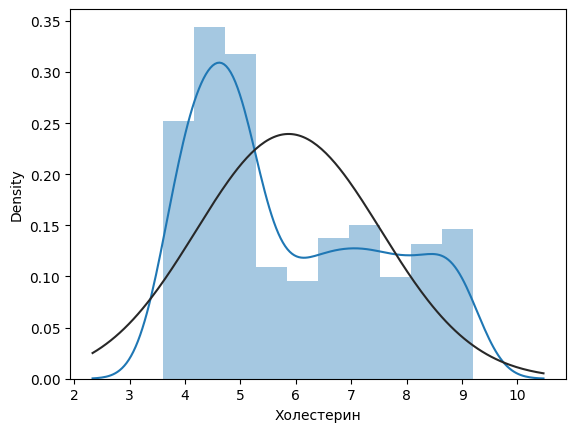

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

sns.distplot(heart1['Холестерин'], fit=norm);

Распределение не нормально

Проверим тестом Шапиро-Уилка распределение в по разным группам заболевания ССЗ

In [ ]:
from scipy.stats import shapiro

statistic0, p_value0 = shapiro(heart1[heart1['ССЗ'] == 0]['Холестерин'])
statistic1, p_value1 = shapiro(heart1[heart1['ССЗ'] == 1]['Холестерин'])

# Вывод результатов для группы БЕЗ ССЗ
print(" ГРУППА БЕЗ ССЗ ")
print("Значение статистики теста Шапиро-Уилка:", statistic0)
print("p-value:", p_value0)

alpha = 0.05
if p_value0 > alpha:
    print("Данные распределены примерно нормально")
else:
    print("Данные НЕ распределены нормально")

print("\n ГРУППА С ССЗ ")
print("Значение статистики теста Шапиро-Уилка:", statistic1)
print("p-value:", p_value1)

if p_value1 > alpha:
    print("Данные распределены примерно нормально")
else:
    print("Данные НЕ распределены нормально")

 ГРУППА БЕЗ ССЗ 
Значение статистики теста Шапиро-Уилка: 0.9572229156784733
p-value: 8.144004811856284e-10
Данные НЕ распределены нормально

 ГРУППА С ССЗ 
Значение статистики теста Шапиро-Уилка: 0.9610626020998628
p-value: 1.643842082358842e-10
Данные НЕ распределены нормально


Распределение в обеих группах не нормально

Строим Q-Q график для наглядности

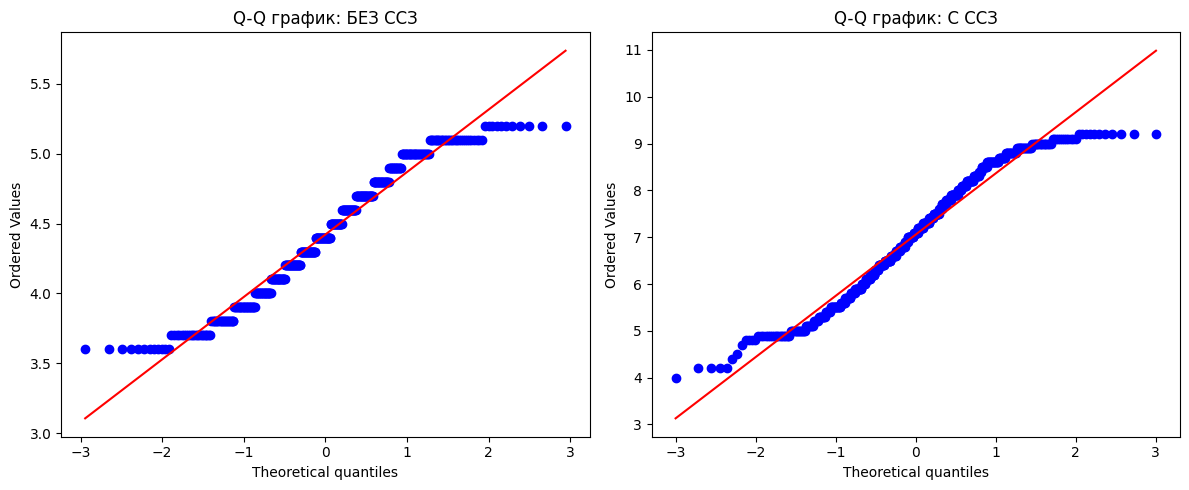

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
# Q-Q график для группы БЕЗ ССЗ
plt.subplot(1, 2, 1)
stats.probplot(heart1[heart1['ССЗ'] == 0]['Холестерин'], dist="norm", plot=ax1)
plt.title('Q-Q график: БЕЗ ССЗ')

# Q-Q график для группы С ССЗ
plt.subplot(1, 2, 2)
stats.probplot(heart1[heart1['ССЗ'] == 1]['Холестерин'], dist="norm", plot=ax2)
plt.title('Q-Q график: С ССЗ')

plt.tight_layout()
plt.show()



Распределение не нормально

**Критерии выбора**  
- Какой тип у признака «Холестерин»? — Количественный

- Сколько сравниваемых групп? — Две (ССЗ=0 и ССЗ=1)

- Группы зависимы? — Нет

- Признак распределён по нормальному закону? — Нет (p-value Шапиро-Уилка = 0.0000 для обеих групп)

Для проверки нашей гипотезы можно использовать U-критерий Манна-Уитни и t-тест Стьюдента для независимых выборок

Критерий Манна–Уитни применяется для случаев, когда распределения в группах не нормальны.

Проверим отличаются ли распределения значений холестерина у людей с ССЗ и без

In [ ]:
g0 = heart1.loc[heart1['ССЗ'] == 0, 'Холестерин'].dropna().values
g1 = heart1.loc[heart1['ССЗ'] == 1, 'Холестерин'].dropna().values

u_stat, p_val = stats.mannwhitneyu(g0, g1, alternative='two-sided')

# Вывод результатов
print("Значение U-статистики:", u_stat)
print("Значение p-value:", p_val)

if p_val < 0.05:
    print("Различия между группами статистически значимы")
else:
    print("Статистически значимых различий между группами не выявлено")

Значение U-статистики: 5008.5
Значение p-value: 8.438974375051526e-142
Различия между группами статистически значимы


Дополнительно проверим t-тестом Стьюдентадля независимых выборок

In [ ]:
from scipy import stats

# Разделение на группы
g0 = heart1.loc[heart1['ССЗ'] == 0, 'Холестерин'].dropna().values
g1 = heart1.loc[heart1['ССЗ'] == 1, 'Холестерин'].dropna().values

# Выполнение двухвыборочного t-теста
t_statistic, p_value = stats.ttest_ind(g0, g1, equal_var=False, nan_policy='omit')

# Вывод результатов
print("Значение t-статистики:", t_statistic)
print("Значение p-value:", p_value)

if p_value < 0.05:
    print("Различия между группами статистически значимы")
else:
    print("Статистически значимых различий между группами не выявлено")

Значение t-статистики: -42.45156359064218
Значение p-value: 3.8641814354066323e-191
Различия между группами статистически значимы


### Вывод по гипотезе 1
Нулевая гипотеза отвергается

Статистически значимые различия в уровне холестерина между группами пациентов с ССЗ и без ССЗ обнаружены.

**Обоснование по тесту Манна-Уитни:**

- p-value = 8.44e-142 (практически 0)
- p-value < 0.05 - различия статистически значимы
- U-статистика = 5008.5 подтверждает наличие различий

**Обоснование по t-тесту Стьюдента:**

- p-value = 3.86e-191 (практически 0)
- p-value < 0.05 - различия статистически значимы
- t-статистика = -42.45 подтверждает наличие сильных различий между группами

**Практическая интерпретация:**
Уровень холестерина значимо различается у людей с сердечно-сосудистыми заболеваниями и без них, что подтверждает связь между повышенным холестерином и риском развития ССЗ.

**Итог:**  Альтернативная гипотеза принята, нулевая гипотеза отвергнута.

## Гипотеза 2: Влияние времени засыпания на риск ССЗ

**Нулевая гипотеза:** Распространенность ССЗ не различается между группами с разным временем засыпания.

**Альтернативная гипотеза:** Существуют статистически значимые различия в распространенности ССЗ между группами с разным временем засыпания.

In [ ]:
heart1.columns

Index(['Возраст алког', 'Работа', 'Статус Курения', 'Переломы',
       'Время пробуждения', 'ЛПВП', 'Выход на пенсию', 'Холестерин',
       'Артериальная гипертония', 'Триглицериды', 'Гепатит', 'Сахарный диабет',
       'Пол', 'Спорт, клубы', 'Семья', 'Частота пасс кур', 'Возраст курения',
       'Травмы за год', 'Регулярный прием лекарственных средств',
       'Национальность', 'Алкоголь', 'Глюкоза плазмы натощак',
       'Абдоминальное ожирение, см', 'Сон после обеда', 'Время засыпания',
       'Хроническое заболевание легких', 'Сигарет в день', 'Образование',
       'Индекс массы тела, кг/м^2', 'Религия', 'Профессия', 'ССЗ',
       'Продолжительность сна'],
      dtype='object')

**Структура данных:**  
- Тип признака "Время засыпания" количественный
- Необходимо категоризировать на 3 группы
- Зависимая переменная: ССЗ (количественная распространенность в группах)
- Сравниваем средние значения ССЗ между тремя группами

In [ ]:
#Создаем группы времени засыпания
heart1['группа_засыпания'] = pd.cut(heart1['Время засыпания'],
                                    bins=[0, 10, 11, 24],
                                    labels=['Раннее', 'Среднее', 'Позднее'])

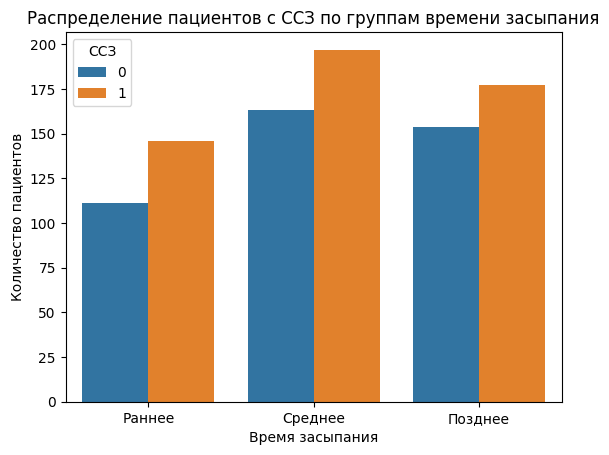

In [ ]:
ax = sns.countplot(data=heart1, x=heart1['группа_засыпания'], hue='ССЗ')
ax.set(xlabel='Время засыпания', ylabel='Количество пациентов')
plt.title('Распределение пациентов с ССЗ по группам времени засыпания')
plt.show()

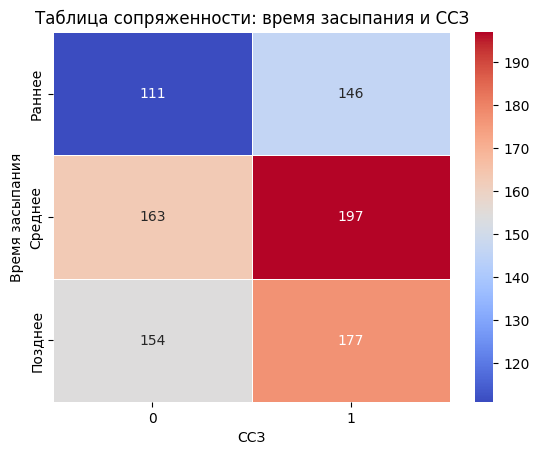

In [ ]:
cross_tab = pd.crosstab(index=heart1['группа_засыпания'], columns=heart1['ССЗ'])
ax = sns.heatmap(cross_tab, annot=True, linewidth=.5, fmt='.0f', cmap="coolwarm")
ax.set(xlabel='ССЗ', ylabel='Время засыпания')
plt.title('Таблица сопряженности: время засыпания и ССЗ')
plt.show()

Согласно данным, распространенность ССЗ немного различается между группами времени засыпания. Чтобы определить, являются ли эти различия статистически значимыми, проведём статистические тесты с целью понять есть ли взаимосвязь между временем засыпания и риском ССЗ.

**Выберем подходящий статистический тест:**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:

- Какой тип у признака «Время засыпания»? — Категориальный.
- Сколько сравниваемых групп? — Три.
- Проверяется независимость групп? — Да.

**Для проверки нашей гипотезы можно использовать критерий χ2 (хи-квадрат).**

In [ ]:
# составляем таблицу сопряжённости
cross_table = pd.crosstab(heart1['группа_засыпания'], heart1['ССЗ'])

cross_table

ССЗ,0,1
группа_засыпания,,
Раннее,111,146
Среднее,163,197
Позднее,154,177


Проводим тест χ2 (хи-квадрат) - статистический тест для проверки связи между двумя категориальными переменными.

In [ ]:
from scipy.stats import chi2_contingency

# проводим тест
chi2, p_value, dof, expected = chi2_contingency(cross_table)

# Вывод результатов
print("Значение статистики хи-квадрат:", chi2)
print("Значение p-value:", p_value)

if p_value < 0.05:
    print("Различия между группами статистически значимы")
else:
    print("Статистически значимых различий между группами не выявлено")

Значение статистики хи-квадрат: 0.6537221040180285
Значение p-value: 0.721183943125173
Статистически значимых различий между группами не выявлено


### Вывод по гипотезе 2

**Нулевая гипотеза не отвергается**

Статистически значимых различий в распространенности ССЗ между группами с разным временем засыпания не обнаружено.

**Обоснование по критерию хи-квадрат:**

- p-value = 0.721 > 0.05 - различия статистически не значимы

- χ²-статистика = 0.654 подтверждает отсутствие значимых различий

- Распределение пациентов с ССЗ равномерно среди всех группы засыпания

**Практическая интерпретация:** Время засыпания не является значимым фактором риска развития сердечно-сосудистых заболеваний. Распространенность ССЗ практически одинакова в группах с ранним, средним и поздним засыпанием.

**Итог:** Нулевая гипотеза принята, альтернативная гипотеза отвергнута. Время засыпания не связано с риском развития ССЗ.

## Гипотеза 3: Влияние индекса массы тела на риск ССЗ в разных возрастных группах


**Нулевая гипотеза:** Влияние индекса массы тела на риск ССЗ одинаково во всех возрастных группах.

**Альтернативная гипотеза:** Влияние индекса массы тела на риск ССЗ различается между возрастными группами


In [ ]:
heart1.columns

Index(['Возраст алког', 'Работа', 'Статус Курения', 'Переломы',
       'Время пробуждения', 'ЛПВП', 'Выход на пенсию', 'Холестерин',
       'Артериальная гипертония', 'Триглицериды', 'Гепатит', 'Сахарный диабет',
       'Пол', 'Спорт, клубы', 'Семья', 'Частота пасс кур', 'Возраст курения',
       'Травмы за год', 'Регулярный прием лекарственных средств',
       'Национальность', 'Алкоголь', 'Глюкоза плазмы натощак',
       'Абдоминальное ожирение, см', 'Сон после обеда', 'Время засыпания',
       'Хроническое заболевание легких', 'Сигарет в день', 'Образование',
       'Индекс массы тела, кг/м^2', 'Религия', 'Профессия', 'ССЗ',
       'Продолжительность сна'],
      dtype='object')

Создаем удобную новую таблицу только для нужных признаков, разделяем возраст на условные группы.

In [ ]:
# Создаем DataFrame с нужными для анализа колонками
df_analysis = heart1[['ССЗ', 'Индекс массы тела, кг/м^2', 'Возраст алког']].copy()

# Переименовываем колонки для удобства
df_analysis.columns = ['ССЗ', 'ИМТ', 'Возраст']

# Категоризируем возраст на 3 группы: 0-30, 30-60, 60+
df_analysis['Возраст'] = pd.cut(df_analysis['Возраст'],
                               bins=[0, 30, 60, 100],
                               labels=['молодые', 'средние', 'возрастные'])

df_analysis

,ССЗ,ИМТ,Возраст
0,0,25.1,молодые
1,1,35.2,возрастные
2,0,19.0,молодые
3,1,31.6,молодые
4,1,32.8,молодые
...,...,...,...
944,0,27.1,молодые
945,0,26.0,молодые
946,1,27.8,молодые
947,0,23.1,молодые


In [ ]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   ССЗ      949 non-null    int64   
 1   ИМТ      949 non-null    float64 
 2   Возраст  949 non-null    category
dtypes: category(1), float64(1), int64(1)
memory usage: 16.0 KB


Проверяем на нормальность с помощью Шапиро-Уилка и графика boxplot


In [ ]:
# Создаем список для хранения результатов теста на нормальность
normality_results = []

# Группируем данные по ССЗ и Возрасту
for (ccz_value, age_value), group_data in df_analysis.groupby(['ССЗ', 'Возраст'])['ИМТ']:
    result = shapiro(group_data)
    normality_results.append({
        'ССЗ': ccz_value,
        'Возраст': age_value,
        'p-value': result.pvalue,
        'Нормальность': result.pvalue > 0.05
    })

# Создаем DataFrame для результатов
normality_results_df = pd.DataFrame(normality_results)

# Выводим результаты
print(normality_results_df)

   ССЗ     Возраст       p-value  Нормальность
0    0     молодые  4.679695e-07         False
1    0     средние  1.252091e-01          True
2    0  возрастные  4.927929e-01          True
3    1     молодые  1.041632e-14         False
4    1     средние  4.118965e-02         False
5    1  возрастные  2.172066e-07         False


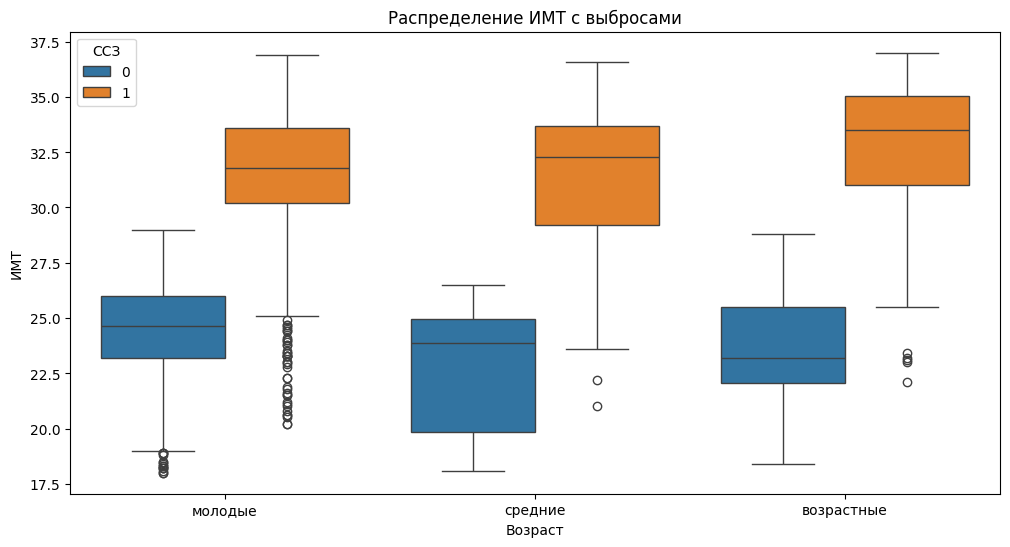

In [ ]:
# Боксплот по группам
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_analysis, x='Возраст', y='ИМТ', hue='ССЗ')
plt.title('Распределение ИМТ с выбросами')
plt.show()

Тест Левене

In [ ]:
from scipy.stats import levene

# Создаем группы для теста Левене
data_young_ccz0 = df_analysis[(df_analysis['Возраст'] == 'молодые') & (df_analysis['ССЗ'] == 0)]['ИМТ']
data_mid_ccz0 = df_analysis[(df_analysis['Возраст'] == 'средние') & (df_analysis['ССЗ'] == 0)]['ИМТ']
data_old_ccz0 = df_analysis[(df_analysis['Возраст'] == 'возрастные') & (df_analysis['ССЗ'] == 0)]['ИМТ']

data_young_ccz1 = df_analysis[(df_analysis['Возраст'] == 'молодые') & (df_analysis['ССЗ'] == 1)]['ИМТ']
data_mid_ccz1 = df_analysis[(df_analysis['Возраст'] == 'средние') & (df_analysis['ССЗ'] == 1)]['ИМТ']
data_old_ccz1 = df_analysis[(df_analysis['Возраст'] == 'возрастные') & (df_analysis['ССЗ'] == 1)]['ИМТ']

# Проводим тест Левене для всех 6 групп
levene_stat, levene_p = levene(data_young_ccz0, data_mid_ccz0, data_old_ccz0,
                               data_young_ccz1, data_mid_ccz1, data_old_ccz1,
                               center='mean')

print(f"Статистика теста Левене: {levene_stat:.4f}")
print(f"p-value: {levene_p:.4f}")

if levene_p > 0.05:
    print("Дисперсии однородны")
else:
    print("Дисперсии НЕ однородные")

Статистика теста Левене: 9.0953
p-value: 0.0000
Дисперсии НЕ однородные


Тест Бартлетта

In [ ]:
from scipy import stats as scs

# Проведение теста Бартлетта для проверки гомогенности дисперсий
statistic, p_value = scs.bartlett(data_young_ccz0, data_mid_ccz0, data_old_ccz0,
                                 data_young_ccz1, data_mid_ccz1, data_old_ccz1)


print("Значение статистики теста Бартлетта:", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("Дисперсии однородные")
else:
    print("Дисперсии НЕ однородные")

Значение статистики теста Бартлетта: 84.31017326580044
p-value: 1.0502122261328911e-16
Дисперсии НЕ однородные


Согласно данным, распределение ИМТ различается между группами по возрасту пациентов с ССЗ и без ССЗ. Чтобы определить, являются ли эти различия статистически значимыми, необходимо провести соответсвующие тесты для проверки гипотезы.

**Выберем подходящий статистический тест:**

- Какой тип у признака «ИМТ»? — Количественный непрерывный

- Сколько сравниваемых групп? — Шесть (3 возрастные группы × 2 группы ССЗ)

- Распределение нормальное? — Нет (проверено тестом Шапиро-Уилка)

- Дисперсии однородны? — Нет (проверено тестами Левене и Бартлетта)

**Для проверки гипотезы можно использовать критерий Краскела-Уоллиса.**

Критерий Краскела-Уоллиса является непараметрическим аналогом однофакторного дисперсионного анализа и не требует предположений о нормальности распределения и однородности дисперсий, что делает его подходящим для наших данных.

In [ ]:
# Получаем уникальные комбинации ССЗ и возрастных групп
levels = df_analysis.groupby(['ССЗ', 'Возраст']).groups.keys()
groups = [df_analysis.loc[(df_analysis['ССЗ'] == ccz) & (df_analysis['Возраст'] == age), 'ИМТ'].dropna().values
          for ccz, age in levels]

# Проводим тест Краскела-Уоллиса
h_stat, p_val = stats.kruskal(*groups)

# Вывод результатов
print("Значение H-статистики:", h_stat)
print("Значение p-value:", p_val)

if p_val < 0.05:
    print("Различия между группами статистически значимы")
else:
    print("Статистически значимых различий между группами не выявлено")

Значение H-статистики: 508.1946056247444
Значение p-value: 1.3594668498014229e-107
Различия между группами статистически значимы


После результата теста Краскела-Уоллиса (p < 0.05) уместно провести пост-хок тест Данна (Dunn test).

In [ ]:
! pip install scikit-posthocs
import scikit_posthocs as sp

In [ ]:
# Создаем комбинированную переменную
df_analysis['ССЗ_Возраст'] = df_analysis['ССЗ'].astype(str) + '_' + df_analysis['Возраст'].astype(str)

# Проводим пост-хок тест Данна
posthoc = sp.posthoc_dunn(
    df_analysis[['ССЗ_Возраст', 'ИМТ']].dropna(),
    val_col='ИМТ',
    group_col='ССЗ_Возраст',
    p_adjust='bonferroni'
)

print("Матрица p-values теста Данна:")
print(posthoc)

Матрица p-values теста Данна:
              0_возрастные     0_молодые     0_средние  1_возрастные  \
0_возрастные  1.000000e+00  1.000000e+00  1.000000e+00  2.924391e-31   
0_молодые     1.000000e+00  1.000000e+00  1.000000e+00  1.299332e-45   
0_средние     1.000000e+00  1.000000e+00  1.000000e+00  8.886912e-08   
1_возрастные  2.924391e-31  1.299332e-45  8.886912e-08  1.000000e+00   
1_молодые     8.319688e-33  7.653397e-77  4.347021e-06  1.524419e-01   
1_средние     4.697415e-07  3.197939e-06  1.275789e-03  1.000000e+00   

                 1_молодые     1_средние  
0_возрастные  8.319688e-33  4.697415e-07  
0_молодые     7.653397e-77  3.197939e-06  
0_средние     4.347021e-06  1.275789e-03  
1_возрастные  1.524419e-01  1.000000e+00  
1_молодые     1.000000e+00  1.000000e+00  
1_средние     1.000000e+00  1.000000e+00  


Высокий ИМТ связан с ССЗ одинаково сильно во всех возрастах - у пациентов с ССЗ ИМТ всегда выше, независимо от того, молодые они, среднего или пожилого возраста.

### Вывод по гипотезе 3

**Нулевая гипотеза не отвергается**

Статистически значимых различий во влиянии индекса массы тела на риск ССЗ между возрастными группами не обнаружено.

**Обоснование по критерию Краскела-Уоллиса и тесту Данна:**

- H-статистика Краскела-Уоллиса = 508.19, p-value = 1.36e-107 - подтверждает наличие статистически значимых различий в распределении ИМТ между анализируемыми группами
- Тест Данна уточняет, что эти различия обусловлены исключительно разницей между группами без ССЗ (0_возрастные, 0_молодые, 0_средние) vs группами с ССЗ (1_возрастные, 1_молодые, 1_средние)
- p-value теста Данна для сравнений внутри групп = 0.152-1.000 > 0.05 - различия между возрастными группами внутри категорий ССЗ статистически не значимы

**Практическая интерпретация:** Влияние индекса массы тела на риск развития сердечно-сосудистых заболеваний не зависит от возрастной группы пациента. Высокий ИМТ ассоциирован с ССЗ одинаково сильно среди молодых, пациентов среднего возраста и пожилых.

**Итог:**  Нулевая гипотеза принята, альтернативная гипотеза отвергнута. Влияние ИМТ на риск ССЗ одинаково во всех возрастных группах.